### Mount my drive and import libraries

In [1]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True) 

Mounted at /content/drive


In [2]:
import sys
sys.path.append("/content/drive/MyDrive/QIC_Final_folder/Code/")  

In [3]:
import MPS_utils # import the main .py script

In [4]:
import matplotlib.pyplot as plt  # helper libraries
import pandas as pd 
import tensorflow as tf


%matplotlib inline
print(tf.__version__) 

2.4.1


In [5]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Load MNIST dataset

In [6]:
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(28, 28)


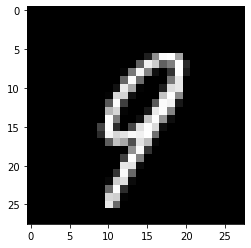

In [7]:
image_index = 22
print(train_images[image_index].shape) 
plt.imshow(train_images[image_index], cmap='gray')

## Varying the bond dimension

In [9]:
bond_dim = [10,40,70,100]

In [10]:
train_images = train_images[:6000]
train_labels = train_labels[:6000] 
test_images = test_images[:1000]
test_labels = test_labels[:1000] 

Dataset preparation

In [11]:
training, one_hot, test, one_hot_test = MPS_utils.dataset_preparation(train_images,train_labels,test_images,test_labels)


In [12]:
b_tot = []
for i in bond_dim:
   fit = MPS_utils.MPS_training(train_dim = training.shape[1], label_one_dim=10, bond_dim=i,
                  training_set=training, training_label=one_hot, test_set=test, test_label=one_hot_test,
                  batch_size=10, epochs=100, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
   b_tot = [b_tot, fit.history] 

Epoch 1/100
600/600 [==============================] - 6s 5ms/step - loss: 1.2645 - accuracy: 0.5538 - val_loss: 0.4406 - val_accuracy: 0.8630
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3279 - accuracy: 0.8999 - val_loss: 0.2614 - val_accuracy: 0.9180
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.2227 - accuracy: 0.9299 - val_loss: 0.3047 - val_accuracy: 0.9010
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1787 - accuracy: 0.9437 - val_loss: 0.2678 - val_accuracy: 0.9130
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1596 - accuracy: 0.9510 - val_loss: 0.2312 - val_accuracy: 0.9270
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1297 - accuracy: 0.9590 - val_loss: 0.2504 - val_accuracy: 0.9310
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.1013 - accuracy: 0.9679 - val_loss: 0.2719 - val_accuracy: 0.9180

In [13]:
b10 = b_tot[0][0][0][1] 
b40 = b_tot[0][0][1]
b70 = b_tot[0][1]
b100 = b_tot[1]

In [16]:
import pandas as pd
b_tot = pd.DataFrame(b10)
b_tot.to_csv('bond10_MNIST_history_final.csv')
! cp bond10_MNIST_history_final.csv "/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/"

b_tot = pd.DataFrame(b40)
b_tot.to_csv('bond40_MNIST_history_final.csv')
! cp bond40_MNIST_history_final.csv "/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/"

b_tot = pd.DataFrame(b70)
b_tot.to_csv('bond70_MNIST_history_final.csv')
! cp bond70_MNIST_history_final.csv "/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/"

b_tot = pd.DataFrame(b100)
b_tot.to_csv('bond100_MNIST_history_final.csv')
! cp bond100_MNIST_history_final.csv "/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/"

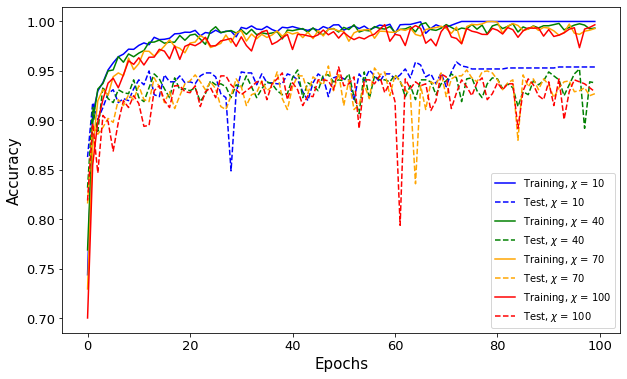

In [14]:
plt.figure(figsize=(10,6))
plt.plot(b10['accuracy'], color='blue',label='Training, $\chi$ = 10')
plt.plot(b10['val_accuracy'],color='blue',linestyle='dashed',label='Test, $\chi$ = 10') 
plt.plot(b40['accuracy'], color='green',label='Training, $\chi$ = 40')
plt.plot(b40['val_accuracy'],color='green',linestyle='dashed',label='Test, $\chi$ = 40') 
plt.plot(b70['accuracy'], color='orange',label='Training, $\chi$ = 70')
plt.plot(b70['val_accuracy'],color='orange',linestyle='dashed',label='Test, $\chi$ = 70') 
plt.plot(b100['accuracy'], color='red',label='Training, $\chi$ = 100')
plt.plot(b100['val_accuracy'],color='red',linestyle='dashed',label='Test, $\chi$ = 100') 
plt.legend(loc=0,prop={'size':10}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/acc_mnist_bound.png')

plt.show() 

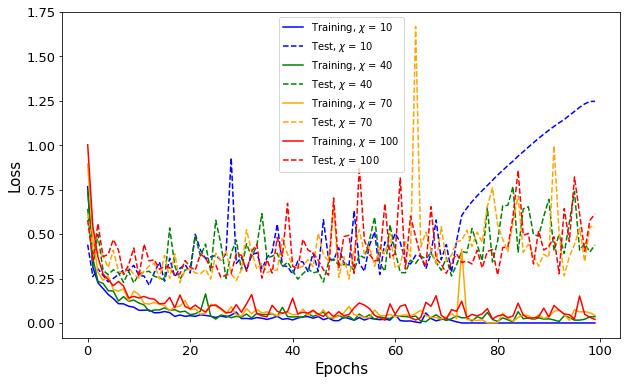

In [15]:
plt.figure(figsize=(10,6))
plt.plot(b10['loss'], color='blue',label='Training, $\chi$ = 10')
plt.plot(b10['val_loss'],color='blue',linestyle='dashed',label='Test, $\chi$ = 10') 
plt.plot(b40['loss'], color='green',label='Training, $\chi$ = 40')
plt.plot(b40['val_loss'],color='green',linestyle='dashed',label='Test, $\chi$ = 40') 
plt.plot(b70['loss'], color='orange',label='Training, $\chi$ = 70')
plt.plot(b70['val_loss'],color='orange',linestyle='dashed',label='Test, $\chi$ = 70') 
plt.plot(b100['loss'], color='red',label='Training, $\chi$ = 100')
plt.plot(b100['val_loss'],color='red',linestyle='dashed',label='Test, $\chi$ = 100') 
plt.legend(loc=0,prop={'size':10}) 
plt.tick_params(labelsize = 13)
plt.xlabel('Epochs',size=15)
plt.ylabel('Loss',size=15)
plt.savefig('/content/drive/MyDrive/QIC_Final_folder/Plot&Results/MNIST/loss_mnist_bound.png')

plt.show()